In [1]:
import numpy as np
from itertools import combinations, chain, count
import matplotlib.pyplot as plt
from math import comb
from scipy.optimize import minimize

## Evenly Spaced Reference Points

In [2]:
def get_betas(m, p):
    '''
    From: Das, Indraneel, and J. E. Dennis. “Normal-Boundary Intersection: A New Method for
    Generating the Pareto Surface in Nonlinear Multicriteria Optimization Problems.” SIAM 
    Journal on Optimization 8, no. 3 (August 1998): 631–57. https://doi.org/10.1137/S1052623496307510.
    '''
    beta = np.fromiter(chain.from_iterable(combinations(range(1, p+m), m-1)), np.float64)
    beta = beta.reshape(beta.shape[0]//(m-1), m-1).T
    beta = beta - np.arange(0, m-1)[:, None] - 1
    beta1 = np.concatenate((beta, np.full((1, beta.shape[1]), p)), axis=0)
    beta2 = np.concatenate((np.zeros((1, beta.shape[1])), beta), axis=0)
    return (beta1 - beta2)/p

def get_hyperplane_points(m, n):
    '''
    Returns at least n points of dimension m on the hyperplane x1 + x2 + x3 + ... = 1
    
    From: Das, Indraneel, and J. E. Dennis. “Normal-Boundary Intersection: A New Method for
    Generating the Pareto Surface in Nonlinear Multicriteria Optimization Problems.” SIAM 
    Journal on Optimization 8, no. 3 (August 1998): 631–57. https://doi.org/10.1137/S1052623496307510.
    '''
    return get_betas(m, next(p for p in count() if comb(p+m-1, m-1) >= n))

get_hyperplane_points(3, 64).shape

(3, 66)

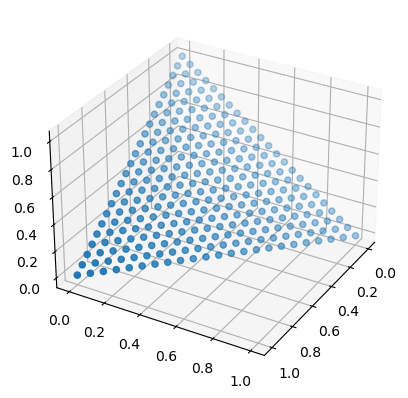

In [3]:
f = get_hyperplane_points(3, 256)
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(f[0], f[1], f[2])
ax.view_init(elev=30, azim=30)

## DTLZ7 Pareto Front

Text(0, 0.5, 'Objective 2')

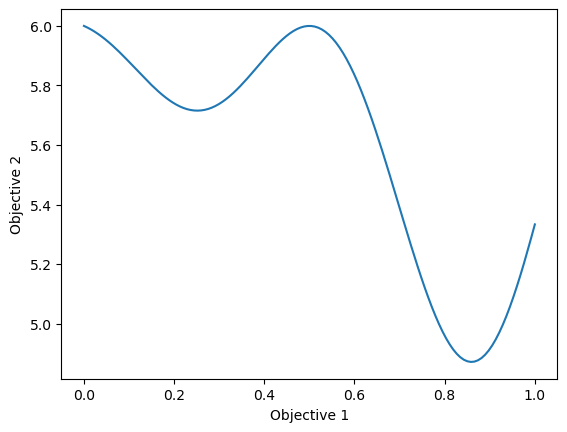

In [4]:
# The first m-1 objectives are copies of the decision variables
# Plot the final objective to see what's happening
def dtlz7_last_obj(x, m=3, n=30):
    x = np.vstack([x]+[np.zeros_like(x)]*(n-1))
    f1 = np.copy(x[:m-1, :])
    f2 = 2 + 9*np.sum(x[m-1:, :], axis=0)/(n - m + 1)
    f2 *= m - np.sum((1 + np.sin(3*np.pi*f1))*f1/(1 + f2[None, :]), axis=0)
    return f2

x = np.linspace(0, 1, 128)
plt.plot(x, dtlz7_last_obj(x, 3))
plt.xlabel("Objective 1")
plt.ylabel("Objective 2")

[(0, 0.25141183661715344), (0.6316265267192559, 0.8594008516924949)]

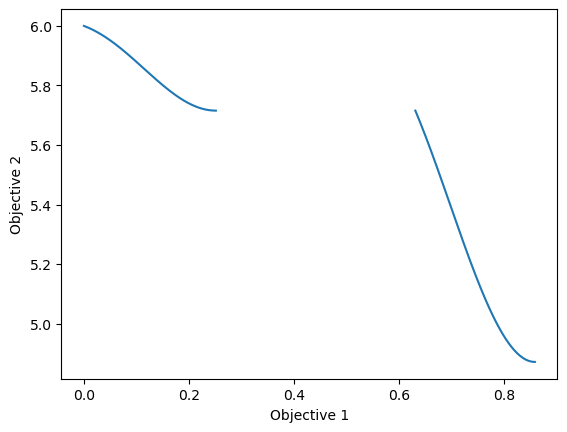

In [5]:
# Find the non-dominated regions for the Pareto front
def make_guesses(fun, npoints):
    x = np.linspace(0, 1, npoints)
    y = fun(x)
    yprime = np.diff(y)
    yprimeprime = np.diff(yprime)

    # Get guesses for the zeros
    epsilon = 2/npoints
    zero_guesses = np.bitwise_and(np.abs(yprime[:-1]) < epsilon, yprimeprime > 0)

    # Merge "blobs" into single points
    blobs = [[]]
    for idx, g in enumerate(zero_guesses):
        if not g and len(blobs[-1]):
            blobs.append([])
        if g:
            blobs[-1].append(x[idx])
    return [(b[0] + b[-1])/2 for b in blobs[:-1]]

def get_minima(fun, npoints):
    return np.array([minimize(fun, guess, bounds=[[guess*0.9, guess*1.1]], tol=1e-13).x[0] for guess in  make_guesses(fun, npoints)])

def get_intercepts(fun, npoints, minima):
    intercepts = []
    for reg_start, reg_stop in zip(minima, minima[1:]):
        x = np.linspace(reg_start + (reg_stop - reg_start)*0.1, reg_stop, npoints)
        guess = x[np.argmin((fun(x) - fun(reg_start))**2)]
        #intercepts.append(guess)
        intercepts.append(minimize(lambda x: (fun(x) - fun(reg_start))**2, guess, bounds=[[reg_start + (reg_stop - reg_start)*0.1, reg_stop]], tol=1e-13).x[0])
    return np.array(intercepts)

def get_nondominated_ranges(fun, npoints):
    minima = get_minima(fun, npoints)
    intercepts = get_intercepts(fun, npoints, minima)
    return list(zip([0] + intercepts.tolist(), minima))

m = 3
n = 25
regs = get_nondominated_ranges(lambda x: dtlz7_last_obj(x, m, n), 2048)
for reg in regs:
    x = np.linspace(*reg, 128)
    y = dtlz7_last_obj(x,  m, n)
    plt.plot(x, y, c='C0')
plt.xlabel("Objective 1")
plt.ylabel("Objective 2")
regs

## Plotting Fronts

In [6]:
import multiopt as mo

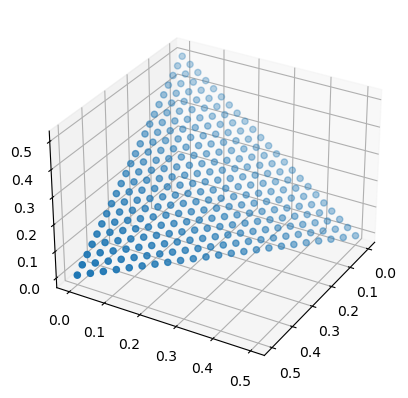

In [7]:
f = mo.DTLZ1().get_pareto_front(256)
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(f[0], f[1], f[2])
ax.view_init(elev=30, azim=30)

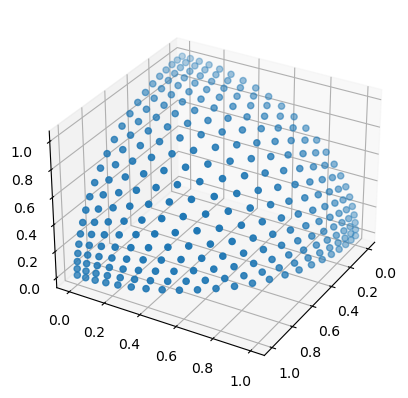

In [8]:
f = mo.DTLZ2().get_pareto_front(256)
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(f[0], f[1], f[2])
ax.view_init(elev=30, azim=30)

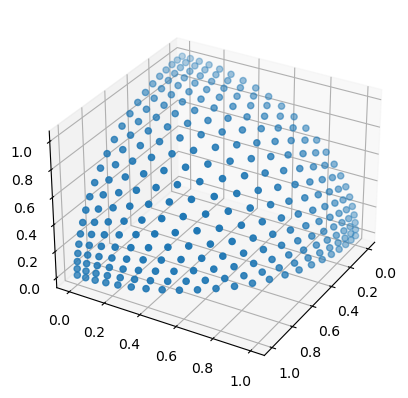

In [9]:
f = mo.DTLZ3().get_pareto_front(256)
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(f[0], f[1], f[2])
ax.view_init(elev=30, azim=30)

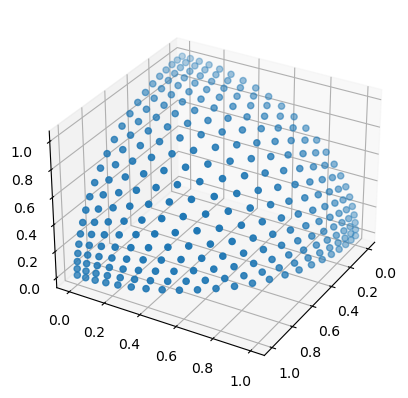

In [10]:
f = mo.DTLZ4().get_pareto_front(256)
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(f[0], f[1], f[2])
ax.view_init(elev=30, azim=30)

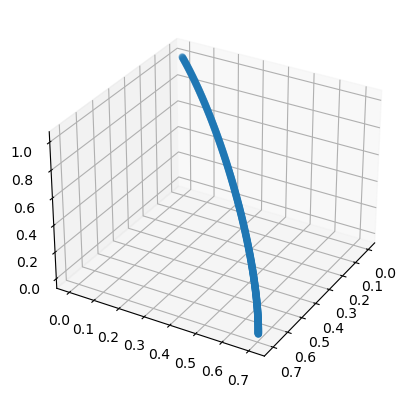

In [11]:
f = mo.DTLZ5().get_pareto_front(256)
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(f[0], f[1], f[2])
ax.view_init(elev=30, azim=30)

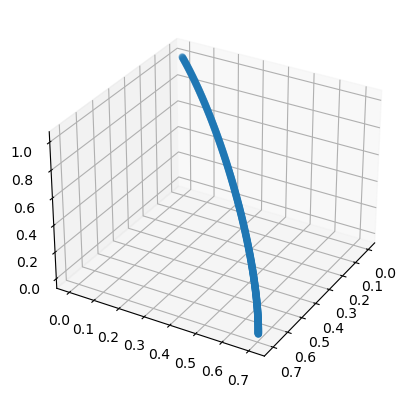

In [12]:
f = mo.DTLZ6().get_pareto_front(256)
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(f[0], f[1], f[2])
ax.view_init(elev=30, azim=30)

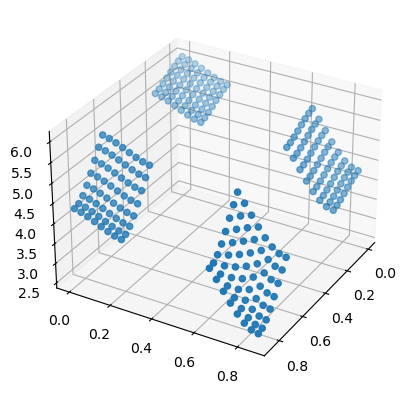

In [13]:
f = mo.DTLZ7().get_pareto_front(256)
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(f[0], f[1], f[2])
ax.view_init(elev=30, azim=30)

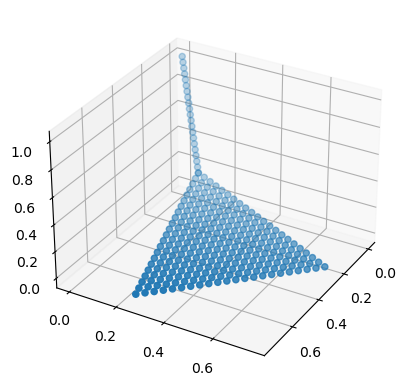

In [14]:
f = mo.DTLZ8().get_pareto_front(256)
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(f[0], f[1], f[-1])
ax.view_init(elev=30, azim=30)

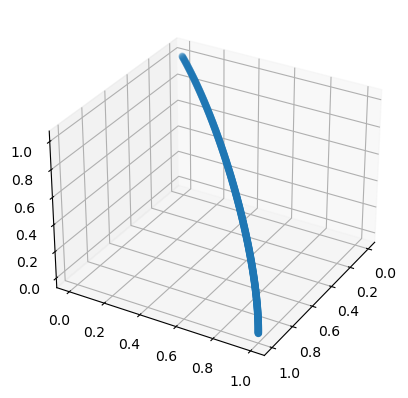

: 

In [15]:
f = mo.DTLZ9().get_pareto_front(256)
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(f[0], f[1], f[-1])
ax.view_init(elev=30, azim=30)